In [4]:
#reading a html page from wikipedia fo the data related to the postal code of neighborhood of Toronto
#collecting first data source...
import pandas as pd
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

df=pd.read_html(url, header=0)[0] # for reading html page 
df=df[df.Borough !='Not assigned']
df.reset_index(drop=True)
#df.reset_index(level='Postal code')
df = df.groupby(['Postal code'],sort=False).agg( ','.join)  # joining locations having same postal code
df1=df.reset_index()
df1.head()

,Postal code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park / Harbourfront
3,M6A,North York,Lawrence Manor / Lawrence Heights
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


In [5]:
#checking the number of different postal code neighborhood
df1.shape

(103, 3)

In [6]:
# The code was removed by Watson Studio for sharing.

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [7]:
df_data_0.shape
df2=df_data_0.rename(columns={"Postal Code":"Postal code"})
df2.head()

,Postal code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [8]:
#merging the two dataframes together for all details regarding the neigborhood along with location.
result=pd.merge(df1,df2,on='Postal code')
result.head()

,Postal code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636
3,M6A,North York,Lawrence Manor / Lawrence Heights,43.718518,-79.464763
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government,43.662301,-79.389494


In [9]:
CLIENT_ID = 'G2HC2NDP0EUHXTEKJ3J5NPGG0BMWKGSC0LSN5K1SHSTDFFUM' # your Foursquare ID
CLIENT_SECRET = 'AGQJYR4S0BNXV5VGLUZCGXCSI1OQGLBW432JXVI3GGKS0XF2' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: G2HC2NDP0EUHXTEKJ3J5NPGG0BMWKGSC0LSN5K1SHSTDFFUM
CLIENT_SECRET:AGQJYR4S0BNXV5VGLUZCGXCSI1OQGLBW432JXVI3GGKS0XF2


In [10]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# method defined to explore all the neighborhood around toronto using foursquare api along with location of the venues.
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        LIMIT=100
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [12]:


toronto_venues = getNearbyVenues(names=result['Neighborhood'],
                                   latitudes=result['Latitude'],
                                   longitudes=result['Longitude']
                                  )



Parkwoods
Victoria Village
Regent Park / Harbourfront
Lawrence Manor / Lawrence Heights
Queen's Park / Ontario Provincial Government
Islington Avenue
Malvern / Rouge
Don Mills
Parkview Hill / Woodbine Gardens
Garden District / Ryerson
Glencairn
West Deane Park / Princess Gardens / Martin Grove / Islington / Cloverdale
Rouge Hill / Port Union / Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate / Bloordale Gardens / Old Burnhamthorpe / Markland Wood
Guildwood / Morningside / West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor / Wilson Heights / Downsview North
Thorncliffe Park
Richmond / Adelaide / King
Dufferin / Dovercourt Village
Scarborough Village
Fairview / Henry Farm / Oriole
Northwood Park / York University
East Toronto
Harbourfront East / Union Station / Toronto Islands
Little Portugal / Trinity
Kennedy Park / Ionview / East Birchmount Park
Bayview Village
D

In [13]:
print(toronto_venues.shape)
toronto_venues.head()


(2133, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


In [14]:
#in total there the 2110 venues thus grouping by the data for the same neighborhood location
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,4,4,4,4,4,4
Alderwood / Long Branch,10,10,10,10,10,10
Bathurst Manor / Wilson Heights / Downsview North,20,20,20,20,20,20
Bayview Village,4,4,4,4,4,4
Bedford Park / Lawrence Manor East,23,23,23,23,23,23
Berczy Park,58,58,58,58,58,58
Birch Cliff / Cliffside West,4,4,4,4,4,4
Brockton / Parkdale Village / Exhibition Place,22,22,22,22,22,22
Business reply mail Processing Centre,15,15,15,15,15,15


In [15]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
# collecting third datasource....neighbourhoods containing Indian Restaurents..
indian=toronto_onehot[toronto_onehot['Indian Restaurant']>0]
indian1=indian[['Neighborhood','Indian Restaurant']]
indian2=indian1.reset_index(drop=True)
indian3=indian2.groupby('Neighborhood').count()
indian3

,Indian Restaurant
Neighborhood,
Bedford Park / Lawrence Manor East,1
Central Bay Street,1
Church and Wellesley,1
Davisville,1
Dorset Park / Wexford Heights / Scarborough Town Centre,2
Harbourfront East / Union Station / Toronto Islands,1
St. James Town / Cabbagetown,1
The Annex / North Midtown / Yorkville,1
The Danforth West / Riverdale,1


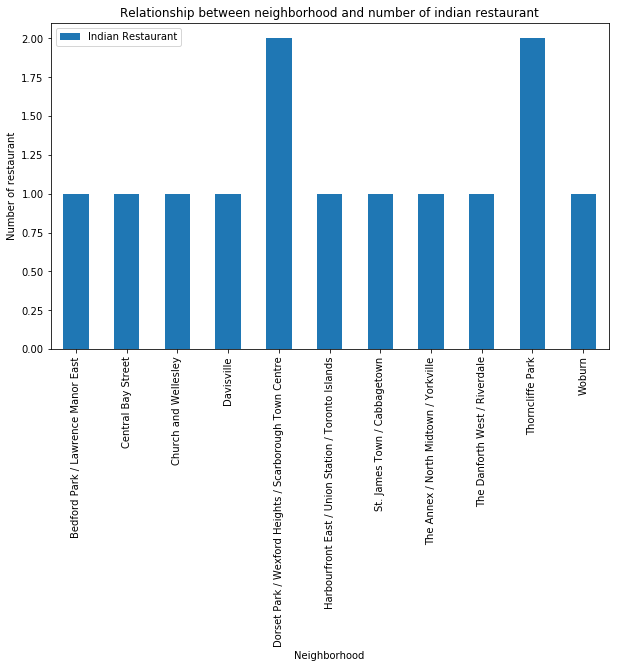

In [18]:
# visualizing the realtionship between neighborhood and no.of indian restaurant.
import matplotlib.pyplot as plt

indian3.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Number of restaurant') # add y-label to the plot
plt.title('Relationship between neighborhood and number of indian restaurant') # add title to the plot

plt.show()

In [17]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_part=toronto_grouped[['Neighborhood','Indian Restaurant']]
toronto_grouped
toronto_part.head()

,Neighborhood,Indian Restaurant
0,Agincourt,0.000000
1,Alderwood / Long Branch,0.000000
2,Bathurst Manor / Wilson Heights / Downsview North,0.000000
3,Bayview Village,0.000000
4,Bedford Park / Lawrence Manor East,0.043478


In [19]:
#geeting the loaction of neighborhood along with location and no. of indian restaurent.
indianrestaurant=pd.merge(result,toronto_part,on='Neighborhood')
indianrestaurant.head()


,Postal code,Borough,Neighborhood,Latitude,Longitude,Indian Restaurant
0,M3A,North York,Parkwoods,43.753259,-79.329656,0.0
1,M4A,North York,Victoria Village,43.725882,-79.315572,0.0
2,M5A,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636,0.0
3,M6A,North York,Lawrence Manor / Lawrence Heights,43.718518,-79.464763,0.0
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government,43.662301,-79.389494,0.0


In [20]:
#collecting datasource ,.....from the link we can check there are four tables conataing the population along with population thus we collect all those tables for checking indian pollution.
url1='https://en.m.wikipedia.org/wiki/Demographics_of_Toronto#Ethnic_diversity'
geodata=pd.read_html(url1)[12]
geodata1=pd.read_html(url1,header=0)[13]
geodata2=pd.read_html(url1,header=0)[14]
geodata3=pd.read_html(url1,header=0)[15]



In [21]:
datag=pd.DataFrame(columns=['Riding','Population','Ethenticity','Percentage'])
datag3=pd.DataFrame(columns=['Riding','Population','Ethenticity','Percentage'])
datag1=pd.DataFrame()
datag2=pd.DataFrame()
final1=geodata1[geodata1.iloc[:,2]=='East Indian']
final2=final1.iloc[:,[0,1,2,3]]
datag['Riding']=final2['Riding']
datag['Population']=final2['Population']
datag['Ethenticity']=final2.iloc[:,2]
datag['Percentage']=final2.iloc[:,3]
datag1=datag1.append(datag,ignore_index='True')

final3=geodata1[geodata1.iloc[:,4]=='East Indian']
final4=final3.iloc[:,[0,1,4,5]]
datag3['Riding']=final4['Riding']
datag3['Population']=final4['Population']
datag3['Ethenticity']=final4.iloc[:,2]
datag3['Percentage']=final4.iloc[:,3]
datag2=datag2.append(datag3,ignore_index='True')
data4=datag1.append(datag2,ignore_index='True')
data4


,Riding,Population,Ethenticity,Percentage
0,Don Valley East,93170,East Indian,10.6
1,Don Valley North,109060,East Indian,7.3
2,Humber River-Black Creek,107725,East Indian,9.2


In [23]:
datag=pd.DataFrame(columns=['Riding','Population','Ethenticity','Percentage'])
datag3=pd.DataFrame(columns=['Riding','Population','Ethenticity','Percentage'])
datag1=pd.DataFrame()
datag2=pd.DataFrame()
final1=geodata2[geodata2.iloc[:,2]=='East Indian']
final2=final1.iloc[:,[0,1,2,3]]
datag['Riding']=final2['Riding']
datag['Population']=final2['Population']
datag['Ethenticity']=final2.iloc[:,2]
datag['Percentage']=final2.iloc[:,3]
datag1=datag1.append(datag,ignore_index='True')

final3=geodata2[geodata2.iloc[:,4]=='East Indian']
final4=final3.iloc[:,[0,1,4,5]]
datag3['Riding']=final4['Riding']
datag3['Population']=final4['Population']
datag3['Ethenticity']=final4.iloc[:,2]
datag3['Percentage']=final4.iloc[:,3]
datag2=datag2.append(datag3,ignore_index='True')
data5=datag1.append(datag2,ignore_index='True')

data6=data5.append(data4,ignore_index='True')
data6

,Riding,Population,Ethenticity,Percentage
0,Scarborough-Rouge Park,101445,East Indian,16.7
1,Scarborough-Guildwood,101115,East Indian,18.0
2,Scarborough Centre,110450,East Indian,12.2
3,Scarborough-Agincourt,104225,East Indian,7.4
4,Scarborough North,97610,East Indian,11.8
5,Don Valley East,93170,East Indian,10.6
6,Don Valley North,109060,East Indian,7.3
7,Humber River-Black Creek,107725,East Indian,9.2


In [24]:
datag=pd.DataFrame(columns=['Riding','Population','Ethenticity','Percentage'])
datag3=pd.DataFrame(columns=['Riding','Population','Ethenticity','Percentage'])
datag1=pd.DataFrame()
datag2=pd.DataFrame()
final1=geodata3[geodata3.iloc[:,2]=='East Indian']
final2=final1.iloc[:,[0,1,2,3]]
datag['Riding']=final2['Riding']
datag['Population']=final2['Population']
datag['Ethenticity']=final2.iloc[:,2]
datag['Percentage']=final2.iloc[:,3]
datag1=datag1.append(datag,ignore_index='True')

data8=data6.append(datag1,ignore_index='True')

data9=data8.set_index('Riding')

#final dataset containing the relationship between neighborhood and indian poplualtion
data9

,Population,Ethenticity,Percentage
Riding,,,
Scarborough-Rouge Park,101445,East Indian,16.7
Scarborough-Guildwood,101115,East Indian,18.0
Scarborough Centre,110450,East Indian,12.2
Scarborough-Agincourt,104225,East Indian,7.4
Scarborough North,97610,East Indian,11.8
Don Valley East,93170,East Indian,10.6
Don Valley North,109060,East Indian,7.3
Humber River-Black Creek,107725,East Indian,9.2
Etobicoke North,116960,East Indian,22.2


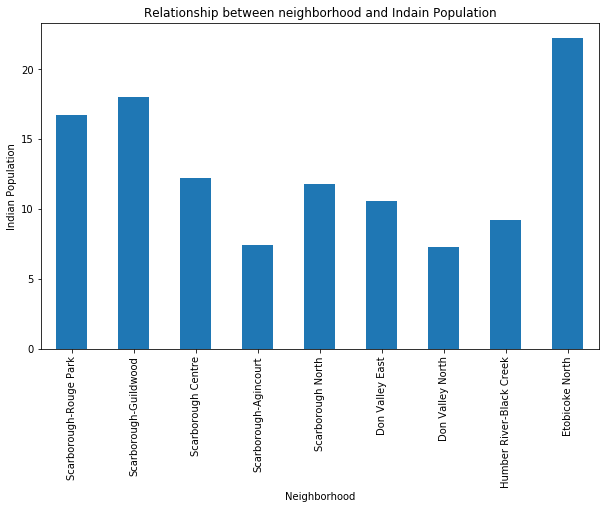

In [25]:
# visualizing the realtionship between neighborhood and no.of indian restaurant.
data10=data9.iloc[:,2]
data10
import matplotlib.pyplot as plt

data10.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Indian Population') # add y-label to the plot
plt.title('Relationship between neighborhood and Indain Population') # add title to the plot

plt.show()

In [21]:
geodata1

,Riding,Population,Ethnic Origin #1,%,Ethnic Origin #2,%.1,Ethnic Origin #3,%.2,Ethnic Origin #4,%.3,Ethnic Origin #5,%.4,Ethnic Origin #6,%.5,Ethnic Origin #7,%.6,Ethnic Origin #8,%.7
0,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.5,Irish,9.2,Russian,8.4
2,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Humber River-Black Creek,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN
4,York Centre,103760,Filipino,17.0,Italian,13.4,Russian,9.5,Canadian,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Don Valley West,101790,English,19.2,Canadian,15.1,Scottish,14.9,Irish,14.2,Chinese,11.2,NaN,NaN,NaN,NaN,NaN,NaN
6,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.0,Filipino,7.8,NaN,NaN


In [22]:
geodata2

,Riding,Population,Ethnic Origin #1,%,Ethnic Origin #2,%.1,Ethnic Origin #3,%.2,Ethnic Origin #4,%.3,Ethnic Origin #5,%.4,Ethnic Origin #6,%.5,Ethnic Origin #7,%.6,Ethnic Origin #8,%.7
0,Scarborough Centre,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,English,7.8,Sri Lankan,7.0,NaN,NaN,NaN,NaN
1,Scarborough Southwest,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,Filipino,9.5,East Indian,8.2,Chinese,7.2,NaN,NaN
2,Scarborough-Agincourt,104225,Chinese,47.0,East Indian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Scarborough-Rouge Park,101445,East Indian,16.7,Canadian,11.8,Sri Lankan,11.1,English,9.8,Filipino,9.3,Jamaican,8.4,Scottish,7.2,Irish,7.0
4,Scarborough-Guildwood,101115,East Indian,18.0,Canadian,11.6,English,9.7,Filipino,8.5,Sri Lankan,7.8,Chinese,7.1,Scottish,7.0,NaN,NaN
5,Scarborough North,97610,Chinese,46.6,East Indian,11.8,Sri Lankan,9.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
geodata3

,Riding,Population,Ethnic Origin #1,%,Ethnic Origin #2,%.1,Ethnic Origin #3,%.2,Ethnic Origin #4,%.3,Ethnic Origin #5,%.4,Ethnic Origin #6,%.5,Ethnic Origin #7,%.6,Ethnic Origin #8,%.7
0,Etobicoke-Lakeshore,127520,English,17.1,Canadian,15.9,Irish,14.4,Scottish,13.5,Polish,9.2,Italian,9.1,Ukrainian,7.6,German,7.1
1,Etobicoke North,116960,East Indian,22.2,Canadian,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Etobicoke Centre,116055,Italian,15.1,English,14.3,Canadian,12.1,Irish,10.8,Scottish,10.4,Ukrainian,8.1,Polish,7.4,NaN,NaN
3,York South-Weston,115130,Portuguese,14.5,Italian,12.8,Canadian,8.7,Jamaican,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
one=indian3.reset_index()
final_data=pd.merge(one,data8,left_on='Neighborhood',right_on='Riding')
final_data

,Neighborhood,Indian Restaurant,Riding,Population,Ethenticity,Percentage


We have seen that indian population and indian restaurant have no relationship between them.It may be possible to old dataset or missing data values.But the hotspots of indian population within toronto can be huge oppurtunity for opening indian restaurents.

<function matplotlib.pyplot.show(*args, **kw)>

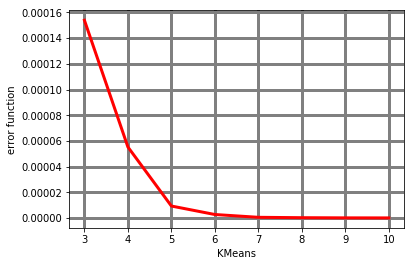

In [27]:
from sklearn.cluster import KMeans
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt 

toronto_part_clustering=toronto_part.drop('Neighborhood',1)
error_cost=[]
for k in range(3,11):
    KM=KMeans(n_clusters=k,max_iter=100)
    try:
        KM.fit(toronto_part_clustering)
    except:
        print("error at line",k)
    error_cost.append(KM.inertia_/100)
    
plt.plot(range(3,11),error_cost,color='r',linewidth='3')
plt.xlabel("KMeans")
plt.ylabel("error function")
plt.grid(color='grey',linestyle='-',linewidth='3')
plt.show


In [24]:
!conda install -c districtdatalabs yellowbrick
from yellowbrick.cluster import KElbowVisualizer



Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - yellowbrick


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    yellowbrick-1.1            |           py36_0         276 KB  districtdatalabs
    pytest-runner-5.2          |             py_0          13 KB
    ------------------------------------------------------------
                                           Total:         289 KB

The following NEW packages will be INSTALLED:

    pytest-runner: 5.2-py_0                   
    yellowbrick:   1.1-py36_0 districtdatalabs


yellowbrick-1.1      | 276 KB    | ##################################### | 100% 
pytest-runner-5.2    | 13 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


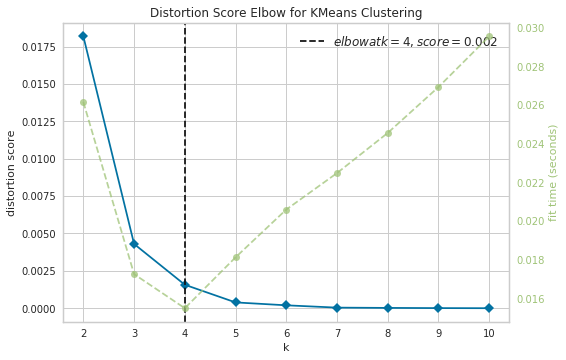

In [26]:
model=KMeans()
visualize=KElbowVisualizer(model,range=(4,11))
visualize.fit(toronto_part_clustering)
visualize.show()
# we can check that k=4 is ideal value fro visualization

In [28]:
# set number of clusters
from sklearn.cluster import KMeans
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_part_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 3, 0, 0, 0, 0, 0], dtype=int32)

In [29]:
# add clustering labels
toronto_part.insert(0, 'Cluster Labels', kmeans.labels_)



In [30]:
toronto_merged = result

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = result.join(toronto_part.set_index('Neighborhood'), on='Neighborhood')

toro1=toronto_merged.dropna()# check the last columns!
convert_dict = {'Cluster Labels': int}
toro1 = toro1.astype(convert_dict) 
print(toro1.dtypes) 
toro1

Postal code           object
Borough               object
Neighborhood          object
Latitude             float64
Longitude            float64
Cluster Labels         int64
Indian Restaurant    float64
dtype: object


,Postal code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Indian Restaurant
0,M3A,North York,Parkwoods,43.753259,-79.329656,0,0.000000
1,M4A,North York,Victoria Village,43.725882,-79.315572,0,0.000000
2,M5A,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636,0,0.000000
3,M6A,North York,Lawrence Manor / Lawrence Heights,43.718518,-79.464763,0,0.000000
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government,43.662301,-79.389494,0,0.000000
6,M1B,Scarborough,Malvern / Rouge,43.806686,-79.194353,0,0.000000
7,M3B,North York,Don Mills,43.745906,-79.352188,0,0.000000
8,M4B,East York,Parkview Hill / Woodbine Gardens,43.706397,-79.309937,0,0.000000
9,M5B,Downtown Toronto,Garden District / Ryerson,43.657162,-79.378937,0,0.000000
10,M6B,North York,Glencairn,43.709577,-79.445073,0,0.000000


In [2]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                       

In [31]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 
address = 'Toronto,Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of toronto are {}, {}.'.format(latitude, longitude))

Solving environment: / ^C
failed

CondaError: KeyboardInterrupt

The geograpical coordinate of toronto are 43.6534817, -79.3839347.


In [32]:
# create map
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toro1['Latitude'], toro1['Longitude'], toro1['Neighborhood'], toro1['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [42]:
toro1.loc[toro1['Cluster Labels'] == 0, toro1.columns[[1] + list(range(5, toro1.shape[1]))]]

,Borough,Cluster Labels,Indian Restaurant
0,North York,0,0.000000
1,North York,0,0.000000
2,Downtown Toronto,0,0.000000
3,North York,0,0.000000
4,Downtown Toronto,0,0.000000
6,Scarborough,0,0.000000
7,North York,0,0.000000
8,East York,0,0.000000
9,Downtown Toronto,0,0.000000
10,North York,0,0.000000


In [43]:
toro1.loc[toro1['Cluster Labels'] == 1, toro1.columns[[1] + list(range(5, toro1.shape[1]))]]

,Borough,Cluster Labels,Indian Restaurant
65,Scarborough,1,0.285714


In [44]:
toro1.loc[toro1['Cluster Labels'] == 2, toro1.columns[[1] + list(range(5, toro1.shape[1]))]]

,Borough,Cluster Labels,Indian Restaurant
41,East Toronto,2,0.023256
55,North York,2,0.041667
74,Central Toronto,2,0.045455
79,Central Toronto,2,0.027778
90,Scarborough,2,0.058824
96,Downtown Toronto,2,0.021739


In [45]:
toro1.loc[toro1['Cluster Labels'] == 3, toro1.columns[[1] + list(range(5, toro1.shape[1]))]]

,Borough,Cluster Labels,Indian Restaurant
29,East York,3,0.1
